<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/7_1_RNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. RNN (Recurrent Neural Network) 개념, 동작원리

## 아키텍처 비교 (NN vs. RNN)
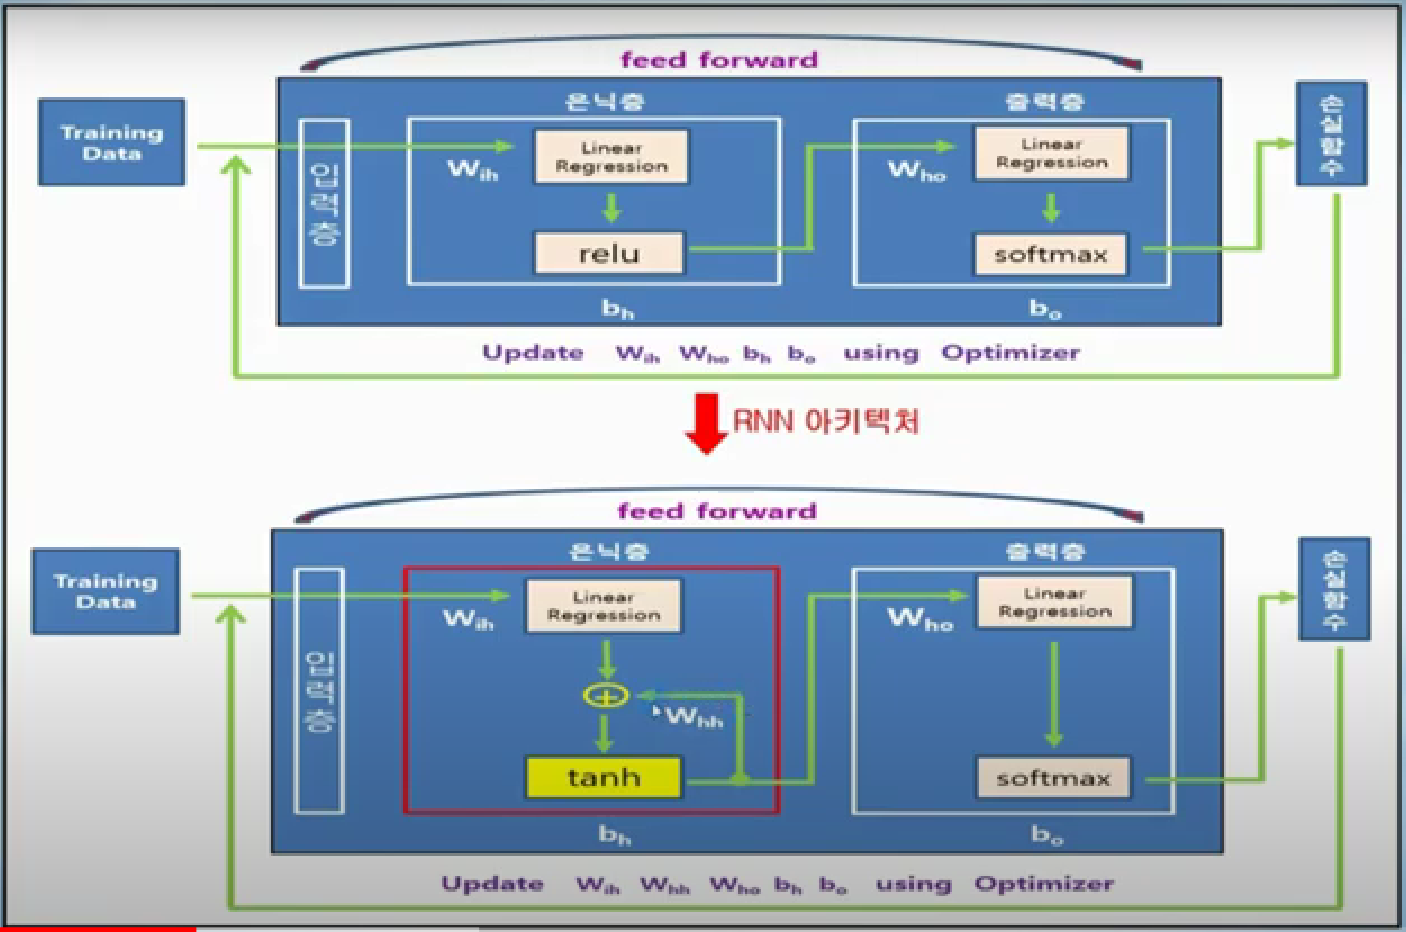

### RNN (Recurrent Neural Network) - 순환 신경망
1. 내부적으로 순환(recurrent)되는 구조를 이용함
2. 순서(sequence)가 있는 데이터를 처리하는 데에 강점을 가진 신경망

### 순서(sequence)가 있는 데이터
1. 문장이나 음성과 같은 연속적인 데이터를 말함. 이런 데이터는 문장에서 놓인 위치(순서)에 따라 의미가 달라짐
1. 즉, 현재 데이터의 의미를 알기 위해서는 이전에 놓여 있는 과거 데이터도 알고 있어야 함.
1. 따라서, RNN은 과거의 데이터를 알기 위해서 2가지 기능을 가지고 있음.
- 은닉층 내에 순환(Recurrent) 구조를 이용하여 과거의 데이터를 기억함.
- 새롭게 입력으로 주어지는 데이터와 은닉층에서 기억하고 있는 데이터를 연결시켜서 그 의미를 알아내는 기능.

### RNN 동작원리 - 시간 개념 포함
1. 순환 구조를 은닉층에서 기억하는 과거의 데이터와 일정 시간이 지난 후에 입력되는 데이터에 연결시켜 주는 구조로 볼 수 있음.
2. 즉, 문장이나 음성 같은 순서가 있는 데이터라는 것은 시간의 경과에 따라서 데이터가 순차적으로 들어온다는 것과 같은 의미.

# SimpleRNN 구조, API 예제

## SimpleRNN
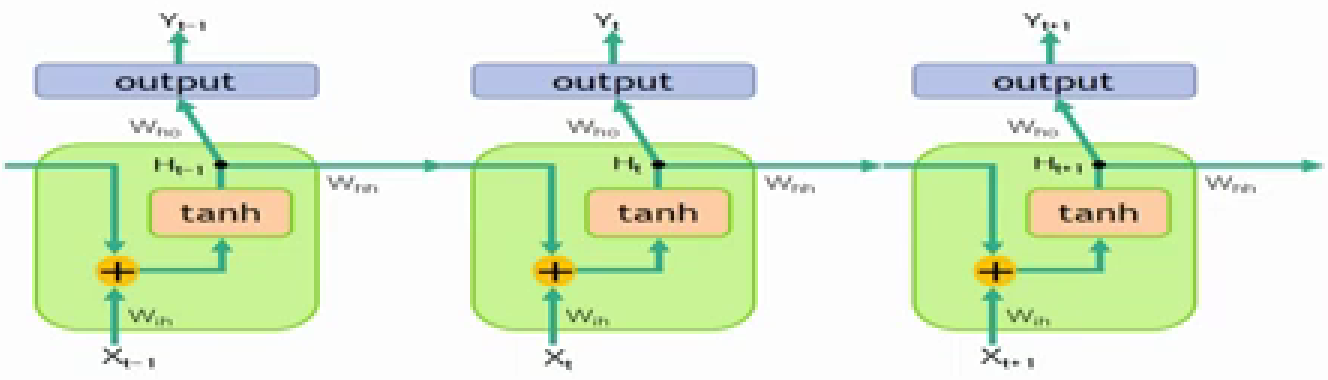

- X : 시간에 따른 입력 데이터
- H : 은닉층 개념의 SimpleRNN 레이어의 출력값
- Y : 출력층의 최종 출력값
- Wih : 입력층과 은닉층 사이의 가중치
- Whh : 시간 t에서 은닉층과 시간 t+1에서의 은닉층 사이의 가중치
- Who : 은닉층과 출력층 사이의 가중치
- Ht : 시간 t에서 은닉층 SimpleRNN 레이어의 출력 Ht = tanh(Xt * Wih + Ht-1 * Whh)

### 시계열 데이터 기반의 RNN 구조
- w(윈도우 크기(window size)) : 이전 데이터 몇 개를 묶을 것인지를 나타냄
- h(수평선 계수(horizontal factor)) : 얼마나 먼 미래의 값을 예측할 것인지를 지정
- 학습 데이터를 w, h를 설정하여 일정한 길이로 패턴을 잘라서 미리 만들어야 함
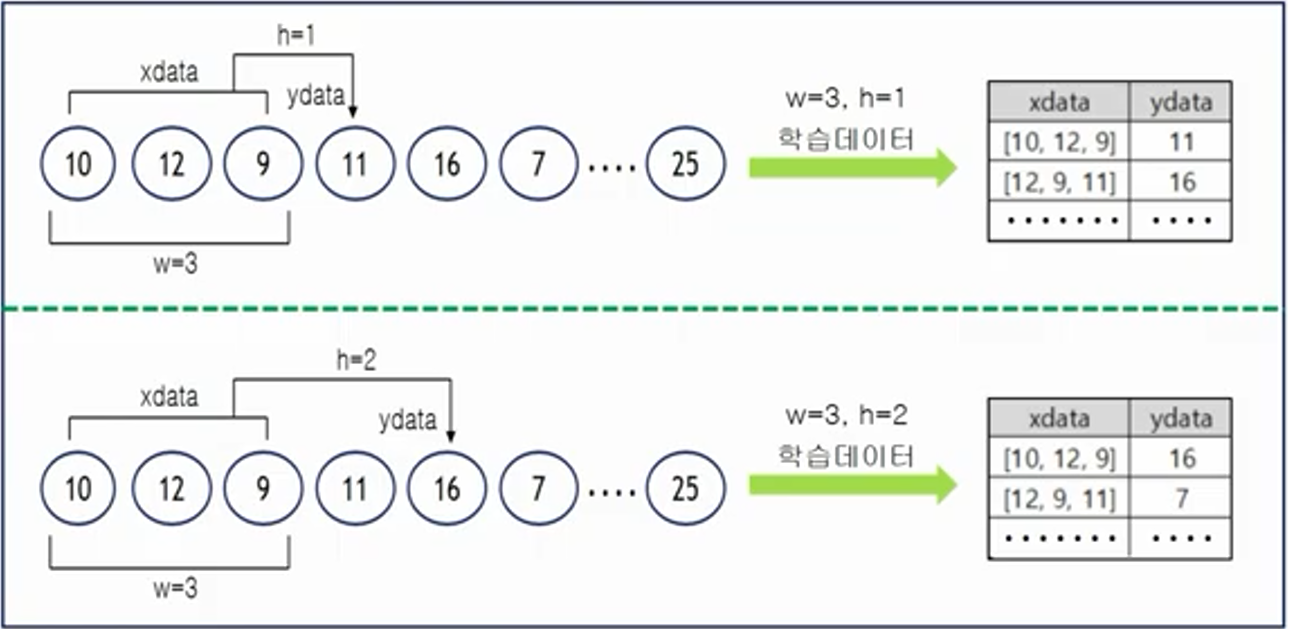

- 참고) RNN에서 h값이 크다면, 현재 값을 기준으로 더욱 먼 미래를 예측하는 것이므로 상당히 어려운 문제일 수 있다.

## SimpleRNN 예제
- 앞쪽 3개의 숫자를 바탕으로 그 다음에 오는 숫자를 예측 (w = 3, h = 1)
- 1개의 SimpleRNN 레이어를 가지는 모델로 구축하는 예제

### SimpleRNN API
- tf.keras.layers.SimpleRNN(units=10, activation='tanh', input_shape=(3, 1))
- units : 일반 신경망에서 은닉층 노드 개수와 같은 개념
- activation : 활성화 함수, RNN에서는 tanh ('relu'와 같은 다른 함수도 사용가능)
- input_shape=(3,1) : 3개의 time-step 데이터를 이용해서 정답을 만든다는 의미 (w=3), RNN 레이어로 한 번에 1개의 데이터가 들어간다는 의미

# RNN 개발 프로세스

## 과정
1. 시계열 데이터 정의

2. 학습데이터 정의
- RNN 모델을 구현할 때 가장 핵심이 되는 부분은 데이터의 구조이고 RNN 레이어 입력 데이터는 (batch size, time steps, input dims)같은 3차원 텐서 구조로 주어져야 함.
- batch size : time steps(=window size)로 분리되어 있는 데이터의 총 개수
- time steps : 몇 개의 데이터를 이용해서 정답을 만들 것인지를 나타내며 window size크기와 동일함
- input dims : RNN 레이어로 한 번에 들어가는 데이터의 개수


3. RNN 모델 구축 및 학습


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

tf.__version__

In [ ]:
# 1. 시계열 데이터 y = 0.5sin(2*x) - cos(x/2) 정의
x = np.arange(0, 100, 0.1) # 0 ~ 100미만 까지 0.1 단위로 쪼개서 numpy 배열 생성
# print(x)
y = 0.5 * np.sin(2*x) - np.cos(x/2.0)
 
# RNN 입력에 필수적인 (batch size, time steps, input dims)의 3차원 텐서 형태의 입력데이터로 쉽게 변환하기 위해 reshape 해줌 (벡터 -> 행렬)
seq_data = y.reshape(-1,1)
# print(seq_data.shape)
# print(seq_data[:5])

In [ ]:
plt.plot(seq_data)
plt.title('0.5sin(2*x) - cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.show()

In [ ]:
# seq2dataset 함수 정의 : 연속적으로 주어진 데이터를 window size와 horizontal factor에 맞는 데이터 형식으로 잘라주는 함수
def seq2dataset(seq, window, horizon):
    X = [] # 입력 데이터를 저장할 리스트
    Y = [] # 정답 데이터를 저장할 리스트

    for i in range( len(seq) - (window + horizon) + 1 ):
        x = seq[ i : (i + window) ] # 1차원 벡터 형태
        y = (seq[i + window + horizon - 1]) # 스칼라 형태

        X.append(x) # 2차원 행렬 형태
        Y.append(y) # 1차원 벡터 형태
    
    return np.array(X), np.array(Y) # X : 3차원 텐서, Y : 2차원 행렬 형태로 반환 -> 참고) np,array()를 사용하면 데이터를 한 차원 높일 수 있다.

In [ ]:
# 2. 입력 데이터 X, 정답 데이터 Y 생성
w = 20 # window size
h = 1 # horizontal factor

X, Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)

In [ ]:
# 3. 트레이닝 데이터 / 테스트 데이터 분리
split_ratio = 0.8 # 학습 데이터 80%, 테스트 데이터 20%로 분리
split = int(split_ratio * len(X))

# 훈련 데이터
x_train = X[0:split]
y_train = Y[0:split]

# 테스트 데이터
x_test = X[split:]
y_test = Y[split:]

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)
# print(x_train[0].shape)

In [ ]:
# 4. SimpleRNN 모델 구축
model = Sequential()

# SimpleRNN 계층에 tanh를 활성화 함수로 가지는 노드 수가 128개이고, 입력 데이터 차원은 (20,1)
model.add(SimpleRNN(units=128, activation='tanh', input_shape=(x_train[0].shape)))
model.add(Dense(1)) # 출력층 노드 수 1개

model.summary()

In [ ]:
# 5. SimpleRNN 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

In [ ]:
# 6. 모델의 정확도 및 손실
# model.evaluate(x_test, y_test)
pred = model.predict(x_test)
print(pred.shape)

In [ ]:
rand_idx = np.random.randint(0, len(y_test), size=5)
print('random idx =', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)
print('\n\nrandom idx =', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])

In [ ]:
plt.plot(y_test, label='label')
plt.plot(pred, label='prediction')

plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.legend(loc='best')

plt.show()